In [1]:
# Machine Learning Code

In [2]:
# In order to start we need to Load in some 

In [28]:
# Intro ML Group Project
from packaging import version
import sklearn
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import the imputer

In [9]:
# Now, we can load the data set so that we can explore all the features.

In [10]:
# Loading in the training data set

taxi_train = pd.read_csv("train.csv", nrows=30000)

In [11]:
# Now for the test data set

taxi_test  = pd.read_csv("test.csv")

In [ ]:
# Now we have to explore the data set

In [5]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [15]:
# A better way to get an idea of what is happening in the data set

taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                30000 non-null  object 
 1   fare_amount        30000 non-null  float64
 2   pickup_datetime    30000 non-null  object 
 3   pickup_longitude   30000 non-null  float64
 4   pickup_latitude    30000 non-null  float64
 5   dropoff_longitude  30000 non-null  float64
 6   dropoff_latitude   30000 non-null  float64
 7   passenger_count    30000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.8+ MB


Text(0.5, 1.0, 'Instances per Fare Amount, in Dollars')

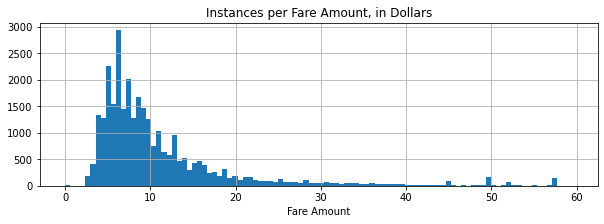

In [91]:
# From the above command we see that we have two object type attributes,
# one integer attribute, and five float type attributes.

# We can have a better understanding of the scales of the different attributes
# By visualizing them

taxi_train[taxi_train.fare_amount <60].fare_amount.hist(bins = 100,
                                                         figsize = (10,3))

plt.xlabel("Fare Amount")
plt.title("Instances per Fare Amount, in Dollars")

In [ ]:
# From afar it seems like most of the fare amounts are between 
# 0 and 20 Dollars, this is something that we can take into consideration when scaling 

Text(0.5, 1.0, 'Instances per Passenger Number')

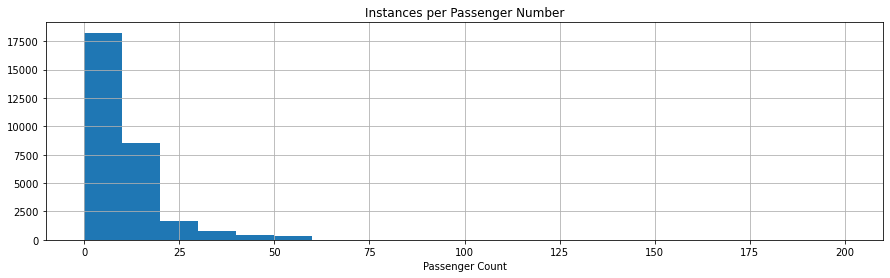

In [98]:
# Lets also take a look at the passenger count

taxi_train[taxi_train.passenger_count <20].fare_amount.hist(bins = 20,
                                                         figsize = (15,4))

plt.xlabel("Passenger Count")
plt.title("Instances per Passenger Number")

In [46]:
# Impute missing values with the mean for Taxi Fare column

taxidf = taxi_train

imputer = SimpleImputer(strategy="mean")

taxi_num = taxidf.select_dtypes(include = [np.number])

imputer.fit(taxi_num)

imputer.transform(taxi_num)

array([[  4.5     , -73.844311,  40.721319, -73.84161 ,  40.712278,
          1.      ],
       [ 16.9     , -74.016048,  40.711303, -73.979268,  40.782004,
          1.      ],
       [  5.7     , -73.982738,  40.76127 , -73.991242,  40.750562,
          2.      ],
       ...,
       [ 15.5     , -73.982182,  40.731252, -73.952945,  40.780147,
          6.      ],
       [  7.3     , -73.989976,  40.762094, -74.005835,  40.741211,
          1.      ],
       [  9.3     , -73.963987,  40.77368 , -73.972325,  40.760127,
          5.      ]])

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

taxi_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("standardizer", StandardScaler())
])

# We can apply the same transformation as above using
# a pipeline to make things more efficient

# Note: Have to keep things even between training and test and training


taxidf_test = taxi_test

#taxi_num_test = taxidf_test.select_dtypes(include = [np.number])

taxi_test = taxi_num_pipeline.fit_transform(taxi_test)

In [102]:
# Display the first few rows of the DataFrame after imputation
print("Imputed Taxi Train Data:")
print(taxidf.head())

Imputed Taxi Train Data:
                             key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2   

In [56]:
# To get a better look

taxi_num

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...
29995,4.5,-73.991408,40.727064,-73.990996,40.733553,1
29996,8.1,-73.955678,40.782552,-73.979262,40.771807,5
29997,15.5,-73.982182,40.731252,-73.952945,40.780147,6
29998,7.3,-73.989976,40.762094,-74.005835,40.741211,1


In [103]:
# Display the info of the imputed DataFrame
print("Imputed Taxi Train Info:")
print(taxidf.info())

Imputed Taxi Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                30000 non-null  object 
 1   fare_amount        30000 non-null  float64
 2   pickup_datetime    30000 non-null  object 
 3   pickup_longitude   30000 non-null  float64
 4   pickup_latitude    30000 non-null  float64
 5   dropoff_longitude  30000 non-null  float64
 6   dropoff_latitude   30000 non-null  float64
 7   passenger_count    30000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.8+ MB
None


In [ ]:
# Now that we know that there are no null numbers we can move on to organizing the other columns

In [73]:
# We need to be able to know the distance traveled but we are only given
# longitude and latitude lines. 

# Since we need to calculate distance on a sphere we can use the Haversine Formula
# Failed Version of HAversine Function

import math

def haversine(lat1, lon1, lat2, lon2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    #lon1, lat1 = coord1
    #lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)

    return km


In [81]:
# Apply to DF
import math

def hav_dist(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2) ** 2 + np.sin(dLon / 2) ** 2 * np.cos(lat1) * np.cos(lat2))
    rad = 6371  # Earth's radius in kilometers
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = rad * c
    return distance



distance = hav_dist(taxi_num['pickup_latitude'], 
                                 taxi_num['pickup_longitude'], 
                                 taxi_num['dropoff_latitude'], 
                                 taxi_num['dropoff_longitude'])

distance

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
29995    0.722379
29996    2.317561
29997    5.968601
29998    2.678930
29999    1.662588
Length: 30000, dtype: float64

In [84]:
# Now we should used the function that we created before to create a
# Column that describes the total distance traveled

taxi_train2 = pd.concat([taxi_num, distance], axis = 1)

taxi_train2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,0
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,1.999157
...,...,...,...,...,...,...,...,...
29995,4.5,-73.991408,40.727064,-73.990996,40.733553,1,0.722379,0.722379
29996,8.1,-73.955678,40.782552,-73.979262,40.771807,5,2.317561,2.317561
29997,15.5,-73.982182,40.731252,-73.952945,40.780147,6,5.968601,5.968601
29998,7.3,-73.989976,40.762094,-74.005835,40.741211,1,2.678930,2.678930


In [ ]:
# We also would like to know more information about the time that these trips take place
# Currently, they are in a format that is not all that useful to us

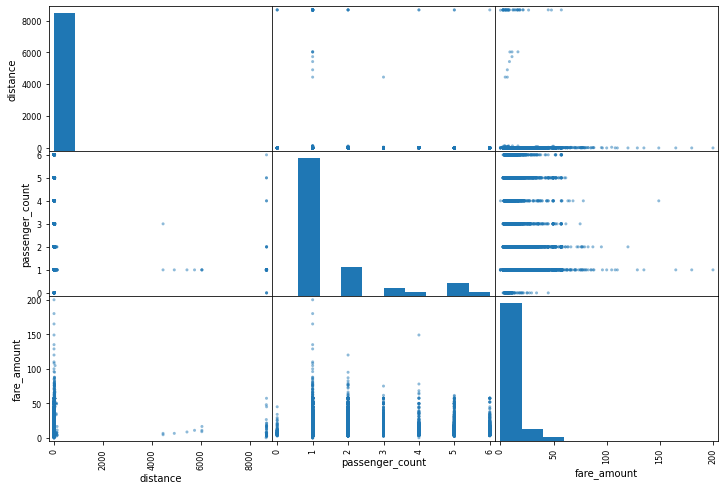

In [86]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["distance", "passenger_count",
              "fare_amount"]
scatter_matrix(taxi_train2[attributes], figsize=(12, 8))
plt.show()

In [ ]:
# Based on the look of the scatter matrix it seems like there is some scaling that needs to be done

In [100]:
# Linear Regressor

lr = LinearRegression()

X_train= taxi_train2[["distance"]].values
y_train= taxi_train2[["fare_amount"]].values
X_test= taxi_test2[["distance"]].values
y_test= taxi_test2[["fare_amount"]].values

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

NameError: name 'taxi_test2' is not defined

In [ ]:
# RandomForest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

In [9]:
# Results appear to be skewed due to the differences in scaling between features

# Dealing with Datetime

taxi_train['pickup_datetime'] = pd.to_datetime(taxi_train.pickup_datetime)
taxi_test['pickup_datetime'] = pd.to_datetime(taxi_test.pickup_datetime)


## We want to be able to work with daytime feature in a way that is useful

In [10]:
# Since there is a lot to be known from the time of pickup we need to separate information

# Incomplete

taxi_train.loc[:, 'pickup_hour'] = taxi_train['pickup_datetime'].taxi_train.hour
taxi_train.loc[:, 'pickup_weekday'] = taxi_train['pickup_datetime'].taxi_train.day_name()
taxi_train.loc[:, 'pickup_date'] = taxi_train['pickup_datetime'].dtaxi_train.day
taxi_train.loc[:, 'pickup_month'] = taxi_train['pickup_datetime'].taxi_train.month
taxi_train.loc[:, 'pickup_day'] = taxi_train['pickup_datetime'].taxi_train.dayofweek
taxi_test.loc[:, 'pickup_hour'] = taxi_test['pickup_datetime'].taxi_train.hour
taxi_test.loc[:, 'pickup_weekday'] = taxi_test['pickup_datetime'].taxi_train.day_name()
taxi_test.loc[:, 'pickup_date'] = taxi_test['pickup_datetime'].taxi_train.day
taxi_test.loc[:, 'pickup_month'] = taxi_test['pickup_datetime'].taxi_train.month
taxi_test.loc[:, 'pickup_day'] = taxi_test['pickup_datetime'].taxi_train.dayofweek

AttributeError: 'Series' object has no attribute 'taxi_train'

In [ ]:
# Resources Used Along the Way Include:


# Calculating distance using the Haversine Formula: https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128#:~:text=All%20of%20these%20can%20be,longitude%20of%20the%20two%20points.

# Done:

1. LR
2. RF

# NTD:

1. seperate date time so that it is a useful format, 
2. Presentation